In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]

1

In [2]:
train_data[0]
train_labels[0]

1

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [7]:
# Preparing the dat


In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
# Building your modeL

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
 ])

In [15]:
model.compile(optimizer="rmsprop",
      loss="binary_crossentropy",
      metrics=["accuracy"])

In [16]:
# Validating your approach

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 166ms/step - accuracy: 0.6058 - loss: 0.6373 - val_accuracy: 0.8560 - val_loss: 0.4855
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8713 - loss: 0.4335 - val_accuracy: 0.8788 - val_loss: 0.3673
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9104 - loss: 0.3103 - val_accuracy: 0.8790 - val_loss: 0.3267
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9322 - loss: 0.2411 - val_accuracy: 0.8879 - val_loss: 0.2911
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9415 - loss: 0.1982 - val_accuracy: 0.8863 - val_loss: 0.2865
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9530 - loss: 0.1641 - val_accuracy: 0.8781 - val_loss: 0.3044
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9600 - loss: 0.1419 - val_accuracy: 0.8838 - val_loss: 0.2887
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9663 - loss: 0.1204 - val_accuracy: 0.8801 - 

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

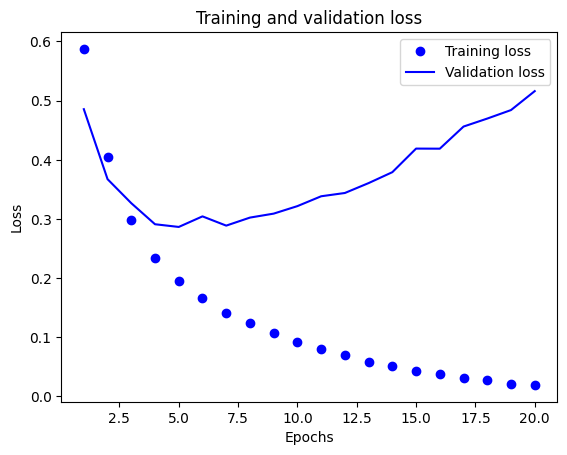

In [21]:
#  Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [22]:
#  Plotting the training and validation accuracy

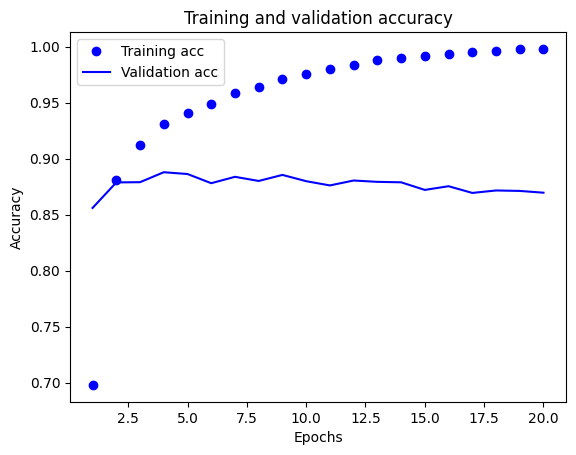

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
#  Listing 4.10 Retraining a model from scratch

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Fit the model
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Evaluate the model
results = model.evaluate(x_test, y_test)

# Print results
print(results)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7218 - loss: 0.5793
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8954 - loss: 0.3127
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9205 - loss: 0.2245
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9341 - loss: 0.1892
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.3058
[0.30087414383888245, 0.878600001335144]


In [26]:
#  Using a trained model to generate predictions on new data?

In [27]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.28057262],
       [0.9993673 ],
       [0.9657033 ],
       ...,
       [0.16095936],
       [0.13753362],
       [0.7551353 ]], dtype=float32)

In [28]:
#  Further experiments

In [29]:
#  The Reuters dataset

In [31]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)


In [32]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in
     train_data[0]])

In [34]:
train_labels[10]

3

In [35]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))

    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [36]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [37]:
# Building your model

In [38]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
 ])

In [39]:
# Compiling the model
model.compile(optimizer="rmsprop",
      loss="categorical_crossentropy",
      metrics=["accuracy"])

In [40]:
#  Validating your approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [41]:
#  Training the model

In [44]:
# Adjusting the slicing indices to match the number of samples
x_val = x_train[:1000]
partial_x_train = x_train[1000:8982]  # Adjusted to match y_train size
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.2716 - loss: 3.1986 - val_accuracy: 0.3540 - val_loss: 2.6251
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3572 - loss: 2.5180 - val_accuracy: 0.3530 - val_loss: 2.4918
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3682 - loss: 2.3423 - val_accuracy: 0.3490 - val_loss: 2.4822
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3964 - loss: 2.2356 - val_accuracy: 0.3460 - val_loss: 2.4876
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4342 - loss: 2.0863 - val_accuracy: 0.3120 - val_loss: 2.4891
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4804 - loss: 1.9349 - val_accuracy: 0.3370 - val_loss: 2.5181
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5074 - loss: 1.8566 - val_accuracy: 0.2910 - val_loss: 2.5776
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5311 - loss: 1.6862 - val_accuracy: 0.3290 - v

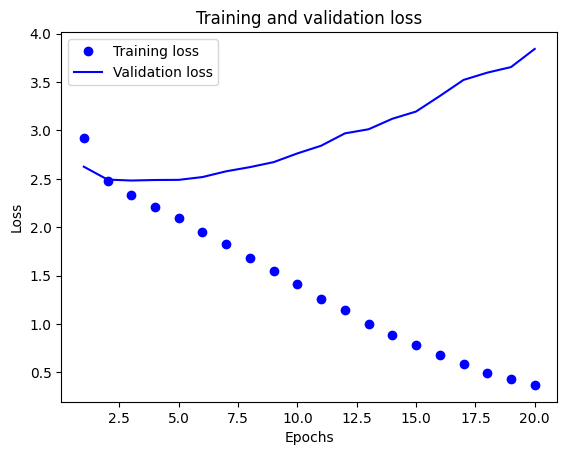

In [45]:
#  Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

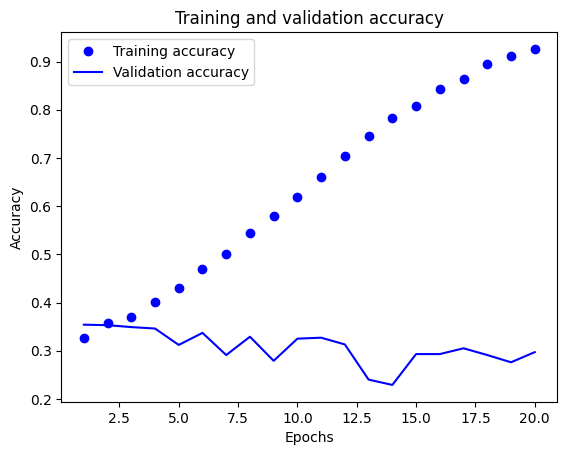

In [47]:
#  Plotting the training and validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")  # 46 categories
])

# Compile the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Adjust x_train and y_train to match sizes
x_train_adjusted = x_train[:8982]
y_train_adjusted = y_train[:8982]

# One-hot encode the labels
y_train_adjusted = to_categorical(y_train_adjusted, num_classes=46)

# Adjust x_test and y_test to have the same number of samples
x_test_adjusted = x_test[:2246]
y_test_adjusted = y_test[:2246]

# One-hot encode the test labels
y_test_adjusted = to_categorical(y_test_adjusted, num_classes=46)

# Train the model
model.fit(x_train_adjusted, y_train_adjusted, epochs=9, batch_size=512)

# Evaluate the model on the adjusted test set
results = model.evaluate(x_test_adjusted, y_test_adjusted)

# Print the evaluation results
print(results)


Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.2815 - loss: 3.1451
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3661 - loss: 2.4608
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4003 - loss: 2.3208
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4150 - loss: 2.2044
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4442 - loss: 2.0480
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4678 - loss: 1.9177
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5181 - loss: 1.7902
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5394 - loss: 1.6426
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6065 - loss: 1.4638
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3267 - loss: 2.7016
[2.7116785049438477, 0.3214603662490845]


In [54]:
#  Generating predictions on new data
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [55]:
#  A different way to handle the labels and the loss

In [57]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [58]:
model.compile(optimizer="rmsprop",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"])

In [59]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
 ])
model.compile(optimizer="rmsprop",
      loss="categorical_crossentropy",
      metrics=["accuracy"])
model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=128,
  validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.0110 - loss: 3.5012 - val_accuracy: 0.2410 - val_loss: 3.0700
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2939 - loss: 2.8513 - val_accuracy: 0.3450 - val_loss: 2.6559
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3790 - loss: 2.4251 - val_accuracy: 0.3550 - val_loss: 2.5391
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3857 - loss: 2.2096 - val_accuracy: 0.3380 - val_loss: 2.5087
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4429 - loss: 2.0464 - val_accuracy: 0.3510 - val_loss: 2.5826
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4745 - loss: 1.9046 - val_accuracy: 0.3430 - val_loss: 2.6370
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4988 - loss: 1.7969 - val_accuracy: 0.3310 - val_loss: 2.7294
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5350 - loss: 1.6467 - val_accuracy: 0.3050 - val_l

In [60]:
#  The Boston housing price dataset

In [61]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [62]:
mean = train_data.mean(axis=0)
train_data-= mean
std = train_data.std(axis=0)
train_data /= std
test_data-= mean
test_data /= std

In [63]:
#  Building your mode

In [65]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [66]:
# K-fold validation

In [67]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'train_data' and 'train_targets' are predefined

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

# Function to build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

for i in range(k):
    # Prepare the validation data: data from partition #k
    print(f"Processing fold #{i}")

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build and train the Keras model (already compiled)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)

    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)

    all_scores.append(val_mae)

print("All validation MAE scores:", all_scores)


Processing fold #0


C:\Users\hoang\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Processing fold #1
Processing fold #2
Processing fold #3
All validation MAE scores: [2.147487163543701, 2.768341064453125, 2.4420127868652344, 2.289231300354004]


In [68]:
#  Saving the validation logs at each fold

In [69]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Assuming 'train_data' and 'train_targets' are predefined
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

# Function to build the model
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

for i in range(k):
    print(f"Processing fold #{i}")

    # Prepare the validation data: data from partition #k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    # Build and train the model
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)

    # Retrieve validation MAE history
    mae_history = history.history["val_mae"]  # Assuming "val_mae" is available
    all_mae_histories.append(mae_history)

# After the loop, all_mae_histories will contain the validation MAE for each fold.
print("All MAE histories:", all_mae_histories)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3
All MAE histories: [[18.77530860900879, 15.40250301361084, 11.156182289123535, 7.058046817779541, 4.916288375854492, 3.9608516693115234, 3.49485182762146, 3.3965303897857666, 3.129789113998413, 3.004122495651245, 2.9118235111236572, 2.8385138511657715, 2.783928871154785, 2.838438034057617, 2.65582013130188, 2.5577094554901123, 2.7362403869628906, 2.4612066745758057, 2.6548304557800293, 2.325449228286743, 2.3332836627960205, 2.241631269454956, 2.3001949787139893, 2.240003824234009, 2.322141170501709, 2.2419235706329346, 2.2237117290496826, 2.2387890815734863, 2.256641149520874, 2.174769401550293, 2.1860780715942383, 2.1184322834014893, 2.083345413208008, 2.130948066711426, 2.191080331802368, 2.088735342025757, 2.3799819946289062, 2.1172749996185303, 2.1012463569641113, 2.0894410610198975, 2.0909335613250732, 2.0174612998962402, 2.2712180614471436, 2.134695291519165, 2.1196448802948, 2.0182740688323975, 2.0112438

In [70]:
#  Building the history of successive mean K-fold validation scores
average_mae_history = [

    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

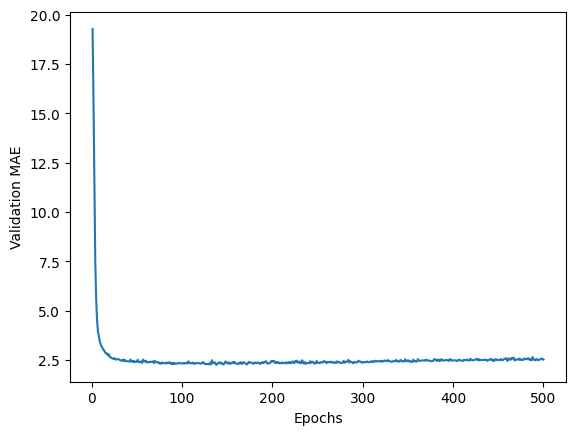

In [71]:
# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()


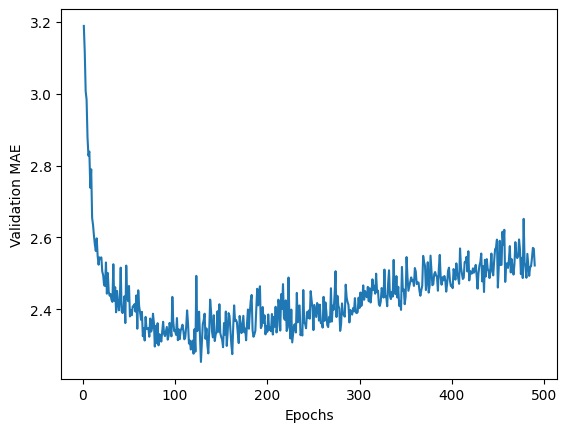

In [72]:
#  Plotting validation scores, excluding the first 10 data points
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [73]:
#  Training the final model

In [75]:
model = build_model()
model.fit(train_data, train_targets,
epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8097 - mae: 2.3625 


In [76]:
# Generating predictions on new data
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([8.587505], dtype=float32)